In [1]:
# Import required libraries for data manipulation, model building, and evaluation
import pandas as pd
from sklearn.ensemble import RandomForestRegressor  # This is for regression tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score  # Regression specific evaluation metrics
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the dataset from an Excel file into a pandas DataFrame
df = pd.read_excel("regression_dataset.xlsx")

In [3]:
# Step 2: Define independent variables (X) by dropping 'FirmID' and the target 'credit_score'
X = df.drop(columns=["FirmID", "credit_score"])  # Independent variables (features)
y = df["credit_score"]  # Continuous target variable

In [4]:
# Step 3: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 4: Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)

In [6]:
# Step 5: Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [7]:
# Step 5.1: Custom Model Summary
print("\n--- Random Forest Regressor Model Summary ---")
print(f"Number of Trees: {len(rf_regressor.estimators_)}")
print(f"Number of Features Used: {rf_regressor.n_features_in_}")
print(f"Feature Names: {list(X.columns)}")
print(f"OOB Score (R² Estimate): {rf_regressor.oob_score_:.4f}")


--- Random Forest Regressor Model Summary ---
Number of Trees: 100
Number of Features Used: 8
Feature Names: ['debt_to_equity', 'current_ratio', 'return_on_assets', 'price_to_earnings', 'interest_coverage', 'asset_turnover', 'market_to_book', 'operating_margin']
OOB Score (R² Estimate): 0.8191


In [8]:
# Step 6: Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [9]:
# Step 7: Evaluate the model's performance
print("\n--- Model Evaluation Metrics ---")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))


--- Model Evaluation Metrics ---
Mean Squared Error (MSE): 5475.541503995721
R-squared (R²): 0.8126762648614304


In [10]:
# Step 8: Feature Importance Plot
importances = rf_regressor.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

In [11]:
print("\n--- Feature Importances ---")
print(importance_df)


--- Feature Importances ---
             Feature  Importance
6     market_to_book    0.266402
0     debt_to_equity    0.253054
2   return_on_assets    0.193387
4  interest_coverage    0.096237
1      current_ratio    0.081312
5     asset_turnover    0.054575
3  price_to_earnings    0.038377
7   operating_margin    0.016655


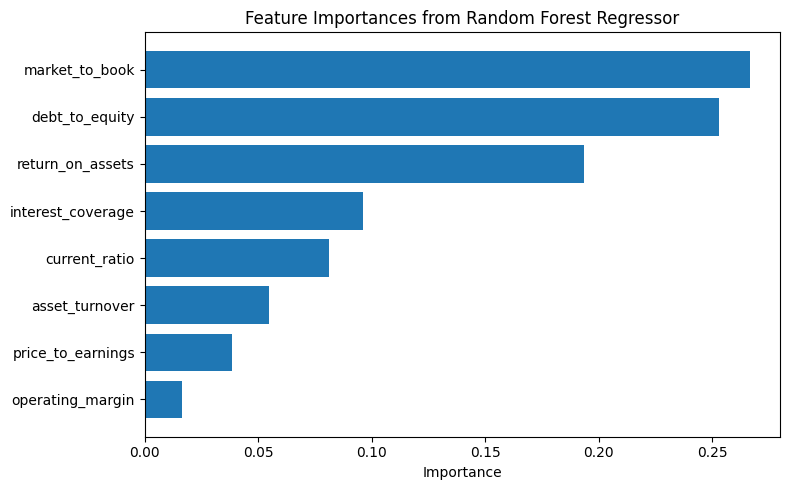

In [12]:
# Plot the feature importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importances from Random Forest Regressor")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()